# Step 1: Data Acquisition

**Chosen Dataset**: **Individual Household Electric Power Consumption Dataset**

**Source**: UCI Machine Learning Repository

**Link**: [Individual Household Electric Power Consumption Dataset](https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumpt##### 
#### **Explanation of  Datasethoice:**

The *Individual Household Electric Power Consumption* dataset is an appropriate choice for regression analysis for the following reasons:

1. **Regression Suitability**: 
   - The dataset includes continuous va`riables like global` a`ctive power, global r`eactiv`e power`, and voltage, which are ideal for regr
   - ssion tasks. The primary aim could be to predict energy consumption based on these and other features.

2. **Rich Temporal Data**:
   - This dataset contains time series data over nearly four years, allowing for the exploration of time-dependent patterns in household po
   - er consumption. Temporal data is particularly useful in regression models for tasks such as forecasting.

3. **Real-World Relevance**:
   - Predicting power consumption is a critical task in energy management, with applications in smart grids, demand forecasting, and e
   - ergy optimization. Insights from this dataset can directly impact energy efficiency and cost reduction strategies.

4. **Sufficient Data Volume**:
   - The dataset comprises over 2 million observations, providing ample data to train and validate comp
   - ex regression models. The large dataset size supports extensive feature engineering, model tuning, and validation.

5. **Data Variety**:
   - The dataset includ `s multiple f`e a`tures like act`iv`e power`, reac`tive power, volta`ge, and current intensity, offering a diverse set of variables
   - for regression analysis. This variety allows for the development of models that can account for various factors influencing power consumption.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Data Cleaning

### 1. Loading the Dataset

In [2]:
# Define the URL to the CSV file
url = 'https://archive.ics.uci.edu/static/public/235/data.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(url)

/tmp/ipykernel_3679/4249827630.py:5: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


### 2. Identifying and Handling Missing Values

In [3]:
print(df.head(20))

          Date      Time Global_active_power Global_reactive_power  Voltage  \
0   16/12/2006  17:24:00               4.216                 0.418  234.840   
1   16/12/2006  17:25:00               5.360                 0.436  233.630   
2   16/12/2006  17:26:00               5.374                 0.498  233.290   
3   16/12/2006  17:27:00               5.388                 0.502  233.740   
4   16/12/2006  17:28:00               3.666                 0.528  235.680   
5   16/12/2006  17:29:00               3.520                 0.522  235.020   
6   16/12/2006  17:30:00               3.702                 0.520  235.090   
7   16/12/2006  17:31:00               3.700                 0.520  235.220   
8   16/12/2006  17:32:00               3.668                 0.510  233.990   
9   16/12/2006  17:33:00               3.662                 0.510  233.860   
10  16/12/2006  17:34:00               4.448                 0.498  232.860   
11  16/12/2006  17:35:00               5.412        

In [4]:
# Check for missing values

missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64


In [5]:
# Impute missing values with the median

df['Sub_metering_3'] = df['Sub_metering_3'].fillna(df['Sub_metering_3'].median())

In [6]:
#  Checking for missing values after imputation

missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64


### 3. Identifying and Removing Duplicate Entries

In [7]:
# Check for duplicate entries

duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


### 4. Correct Data Type Inconsistencies

In [8]:
print(df.dtypes)

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object


#### a. Convert Date and Time to a datetime format

In [9]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time

df['Hour'] = df['Time'].apply(lambda x: x.hour)
df['Minute'] = df['Time'].apply(lambda x: x.minute)
df['Second'] = df['Time'].apply(lambda x: x.second)

#  Drop the time column since I've split it to hour, minute & Seconds
df.drop('Time', axis=1, inplace=True)


#### b. Convert numeric columns from `object` to `float`

In [10]:
numeric_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [11]:
print(df.dtypes)

Date                     datetime64[ns]
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
Hour                              int64
Minute                            int64
Second                            int64
dtype: object


In [12]:
print(df.describe())

                                Date  Global_active_power  \
count                        2075259         2.049280e+06   
mean   2008-12-05 19:13:27.255191040         1.091615e+00   
min              2006-12-16 00:00:00         7.600000e-02   
25%              2007-12-12 00:00:00         3.080000e-01   
50%              2008-12-06 00:00:00         6.020000e-01   
75%              2009-12-01 00:00:00         1.528000e+00   
max              2010-11-26 00:00:00         1.112200e+01   
std                              NaN         1.057294e+00   

       Global_reactive_power       Voltage  Global_intensity  Sub_metering_1  \
count           2.049280e+06  2.049280e+06      2.049280e+06    2.049280e+06   
mean            1.237145e-01  2.408399e+02      4.627759e+00    1.121923e+00   
min             0.000000e+00  2.232000e+02      2.000000e-01    0.000000e+00   
25%             4.800000e-02  2.389900e+02      1.400000e+00    0.000000e+00   
50%             1.000000e-01  2.410100e+02      2.

# Step 3: Feature Engineering

### 1. Hourly Energy Consumption `(Hourly_Consumption):`

- **Description**: Calculate the total energy consumption per hour. This can be derived by summing `Global_active_power`, `Sub_metering_1`, `Sub_metering_2`, and `Sub_metering_3` for each hour.

In [13]:
df['Hourly_Consumption'] = df['Global_active_power'] + df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3']

### 2. Time of Day `(Time_of_Day)`:

- **Description**: Create a feature that represents the time of day as a continuous variable. This can be derived by converting the `Hour`, `Minute`, and `Second` into a single numerical value, such as the fraction of the day.

In [14]:
df['Time_of_Day'] = df['Hour'] + df['Minute'] / 60 + df['Second'] / 3600

### 3. Day of Week `(Day_of_Week)`:

- **Description**: Extract the day of the week from the Date column and encode it as a categorical variable.

In [15]:
df['Day_of_Week'] = df['Date'].dt.dayofweek

- Check Data Types and Missing Values

In [16]:
print(df.dtypes)
print(df.isnull().sum())

Date                     datetime64[ns]
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
Hour                              int64
Minute                            int64
Second                            int64
Hourly_Consumption              float64
Time_of_Day                     float64
Day_of_Week                       int32
dtype: object
Date                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3               0
Hour                         0
Minute                       0
Second                       0
Hourly_Consumption       25979
Time_of_Day                  0
Day_of_Week            

In [17]:
df.fillna({
    'Global_active_power': df['Global_active_power'].median(),
    'Global_reactive_power': df['Global_reactive_power'].median(),
    'Voltage': df['Voltage'].median(),
    'Global_intensity': df['Global_intensity'].median(),
    'Sub_metering_1': df['Sub_metering_1'].median(),
    'Sub_metering_2': df['Sub_metering_2'].median(),
    'Hourly_Consumption': df['Hourly_Consumption'].median()
}, inplace=True)


In [18]:
print(df[['Hourly_Consumption', 'Time_of_Day', 'Day_of_Week', 'Global_active_power']].corr())

                     Hourly_Consumption  Time_of_Day  Day_of_Week  \
Hourly_Consumption             1.000000     0.175413     0.047319   
Time_of_Day                    0.175413     1.000000     0.000175   
Day_of_Week                    0.047319     0.000175     1.000000   
Global_active_power            0.868587     0.279645     0.063019   

                     Global_active_power  
Hourly_Consumption              0.868587  
Time_of_Day                     0.279645  
Day_of_Week                     0.063019  
Global_active_power             1.000000  


# Step 4: Data Visualisation

### 1. Distribution of the Target Variable

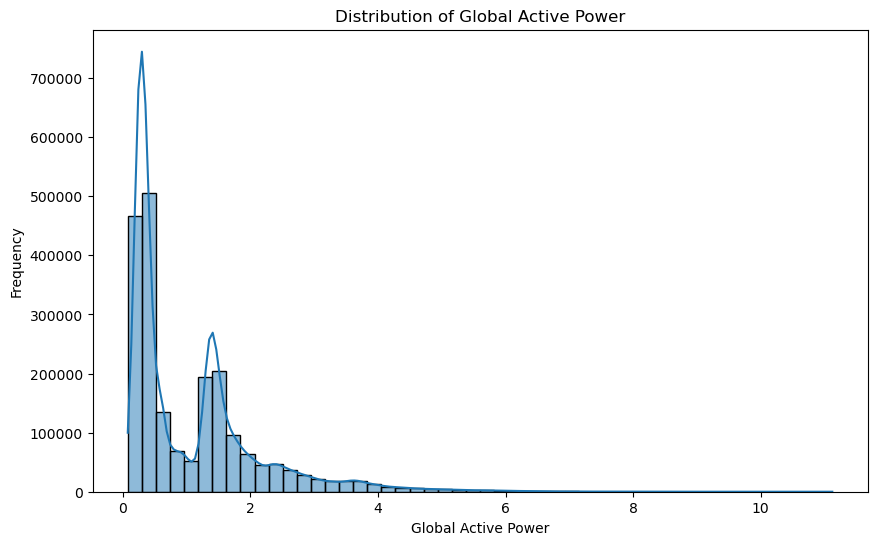

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Global_active_power'], bins=50, kde=True)
plt.title('Distribution of Global Active Power')
plt.xlabel('Global Active Power')
plt.ylabel('Frequency')
plt.show()

- **Interpretation** : This histogram shows the distribution of the `Global_active_power` variable.

### 2. Correlation Matrix Heatmap

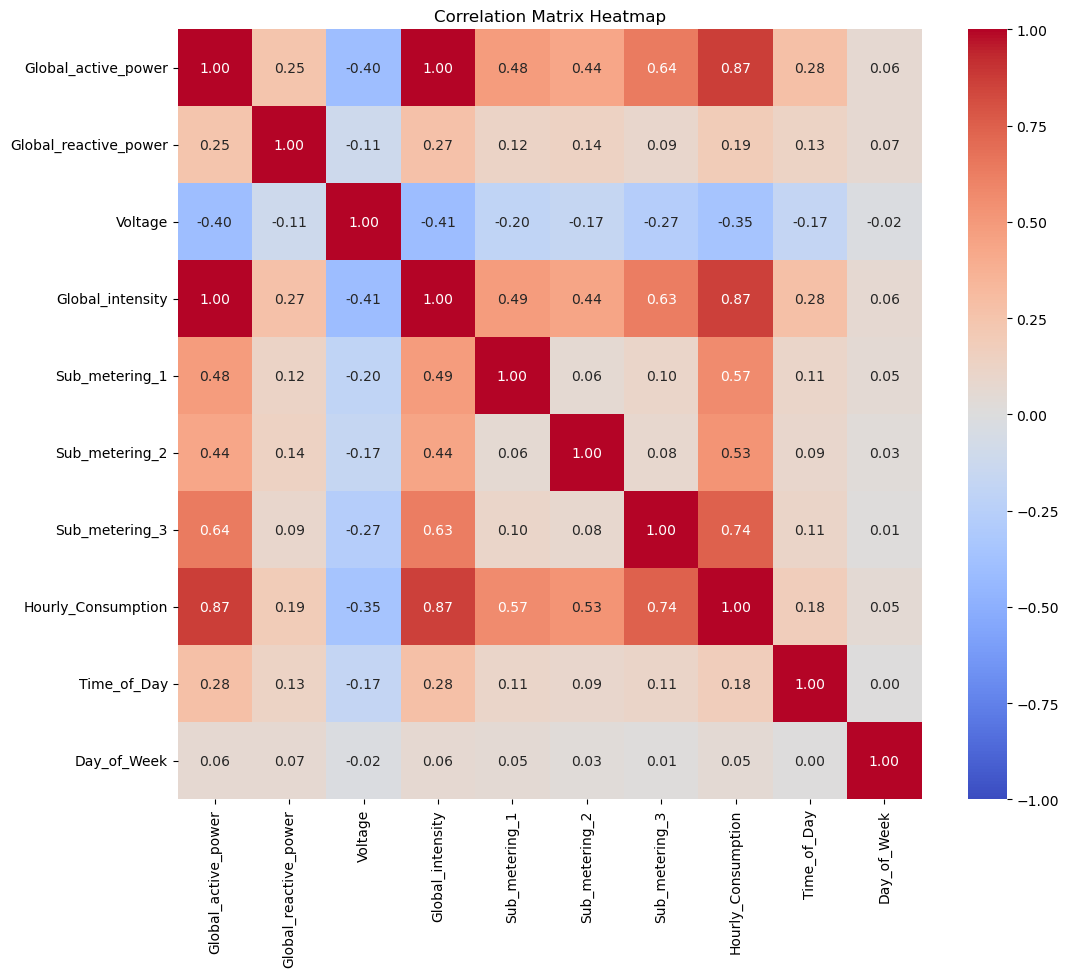

In [20]:
plt.figure(figsize=(12, 10))
correlation_matrix = df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'Hourly_Consumption', 'Time_of_Day', 'Day_of_Week']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

- **Interpretation** : This visualization helps identify which features are strongly correlated with each other and with the target variable. Strong correlations can suggest multicollinearity, while weak correlations may indicate less relevant features.

### 3. Scatter Plots Showing Relationships Between Features and the Target Variable

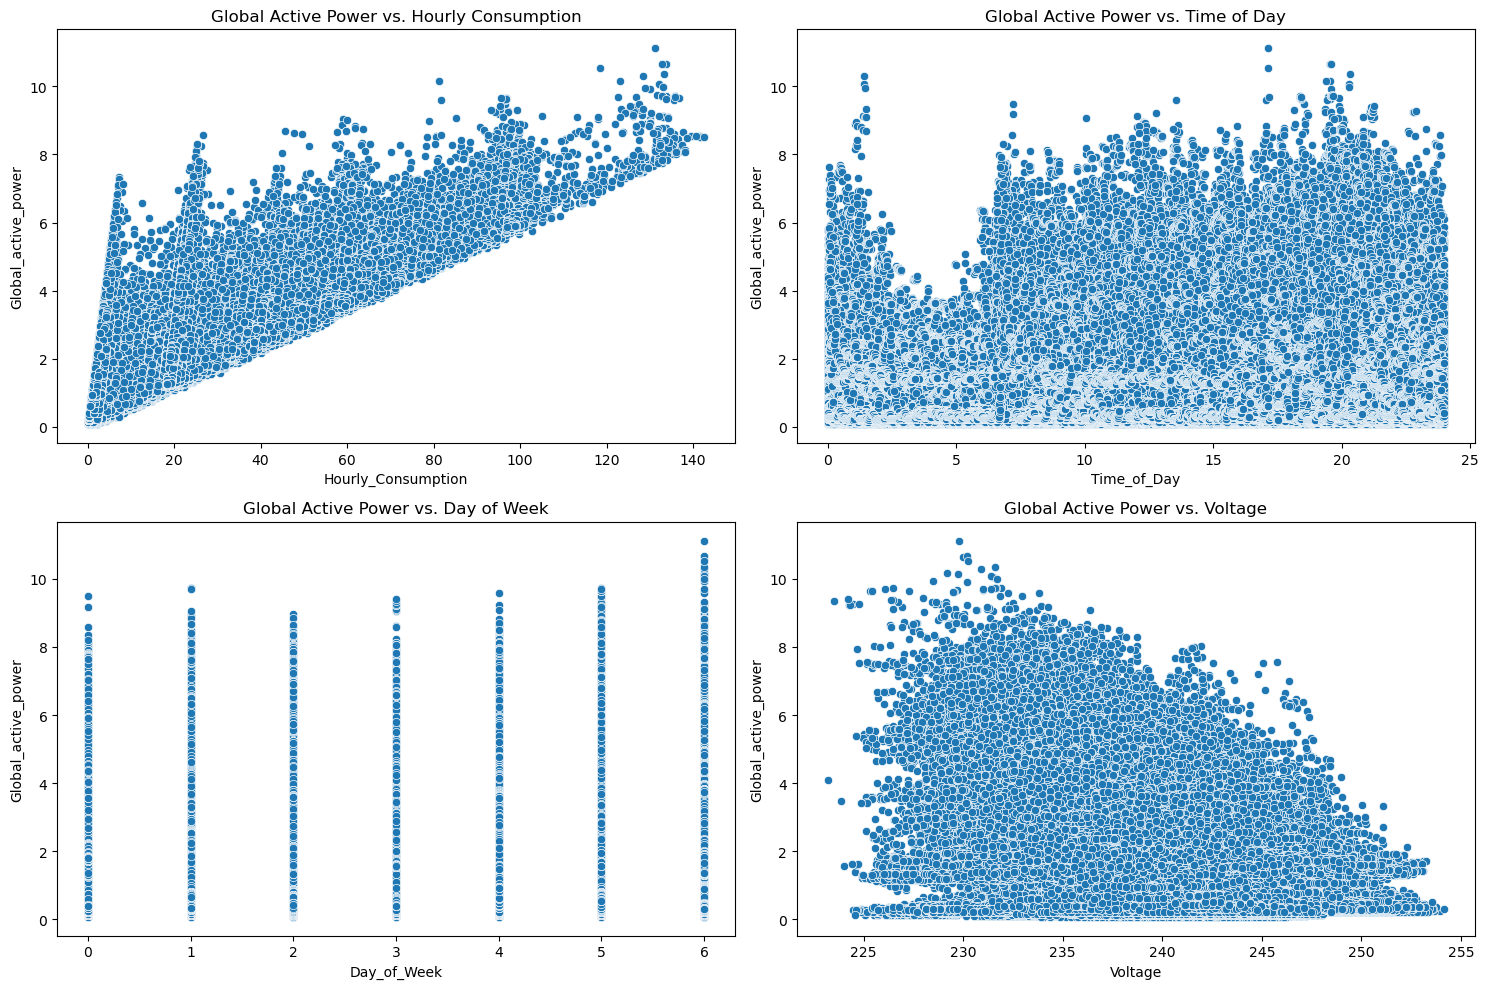

In [21]:
plt.figure(figsize=(15, 10))

# Scatter plot of Global Active Power vs. Hourly Consumption
plt.subplot(2, 2, 1)
sns.scatterplot(x='Hourly_Consumption', y='Global_active_power', data=df)
plt.title('Global Active Power vs. Hourly Consumption')

# Scatter plot of Global Active Power vs. Time of Day
plt.subplot(2, 2, 2)
sns.scatterplot(x='Time_of_Day', y='Global_active_power', data=df)
plt.title('Global Active Power vs. Time of Day')

# Scatter plot of Global Active Power vs. Day of Week
plt.subplot(2, 2, 3)
sns.scatterplot(x='Day_of_Week', y='Global_active_power', data=df)
plt.title('Global Active Power vs. Day of Week')

# Scatter plot of Global Active Power vs. Voltage
plt.subplot(2, 2, 4)
sns.scatterplot(x='Voltage', y='Global_active_power', data=df)
plt.title('Global Active Power vs. Voltage')

plt.tight_layout()
plt.show()


- **Interpretation**: These scatter plots show how the `Global_active_power` relates to other features.

### 4. Box Plots to Identify Outliers

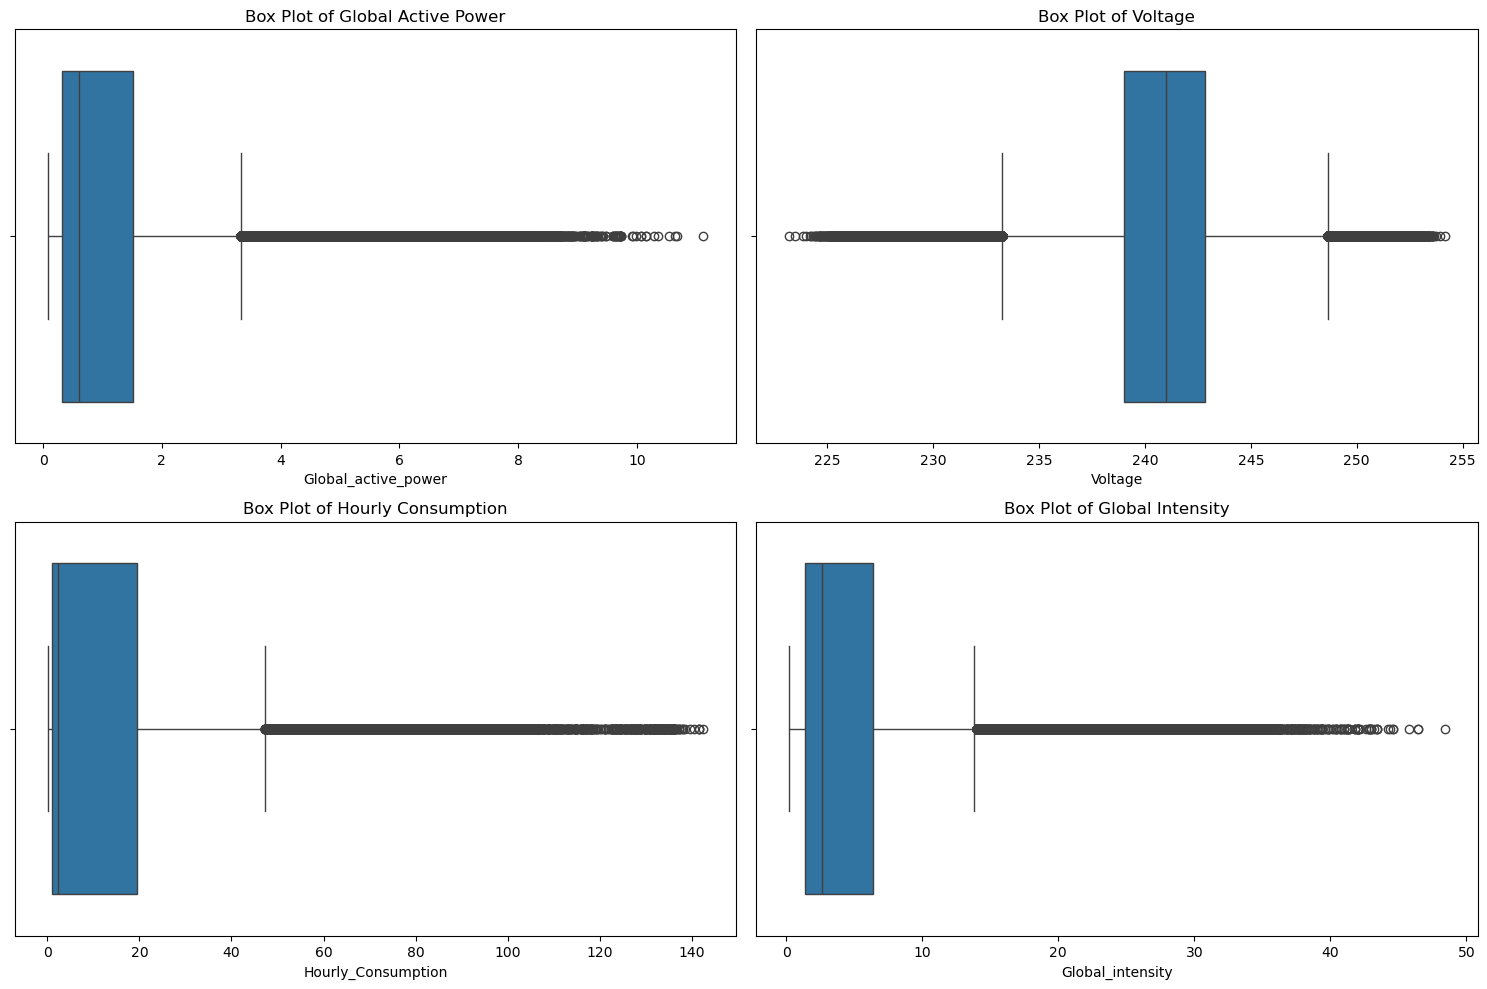

In [22]:
plt.figure(figsize=(15, 10))

# Box plot of Global Active Power
plt.subplot(2, 2, 1)
sns.boxplot(x='Global_active_power', data=df)
plt.title('Box Plot of Global Active Power')

# Box plot of Voltage
plt.subplot(2, 2, 2)
sns.boxplot(x='Voltage', data=df)
plt.title('Box Plot of Voltage')

# Box plot of Hourly Consumption
plt.subplot(2, 2, 3)
sns.boxplot(x='Hourly_Consumption', data=df)
plt.title('Box Plot of Hourly Consumption')

# Box plot of Global Intensity
plt.subplot(2, 2, 4)
sns.boxplot(x='Global_intensity', data=df)
plt.title('Box Plot of Global Intensity')

plt.tight_layout()
plt.show()


### 5. Pair Plot of Selected Features

<Figure size 1200x1000 with 0 Axes>

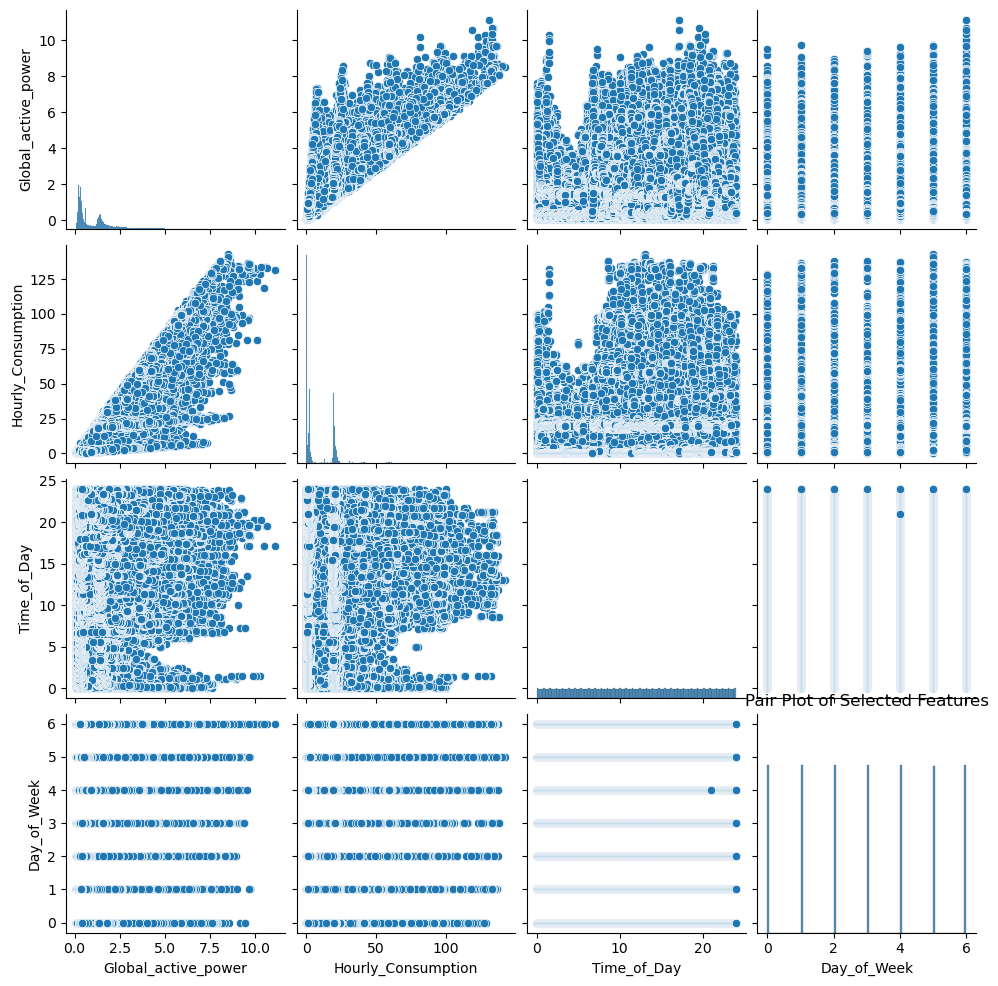

In [23]:
plt.figure(figsize=(12, 10))
sns.pairplot(df[['Global_active_power', 'Hourly_Consumption', 'Time_of_Day', 'Day_of_Week']])
plt.title('Pair Plot of Selected Features')
plt.show()


### 6. Pairwise Plots for New Features


<Figure size 1000x800 with 0 Axes>

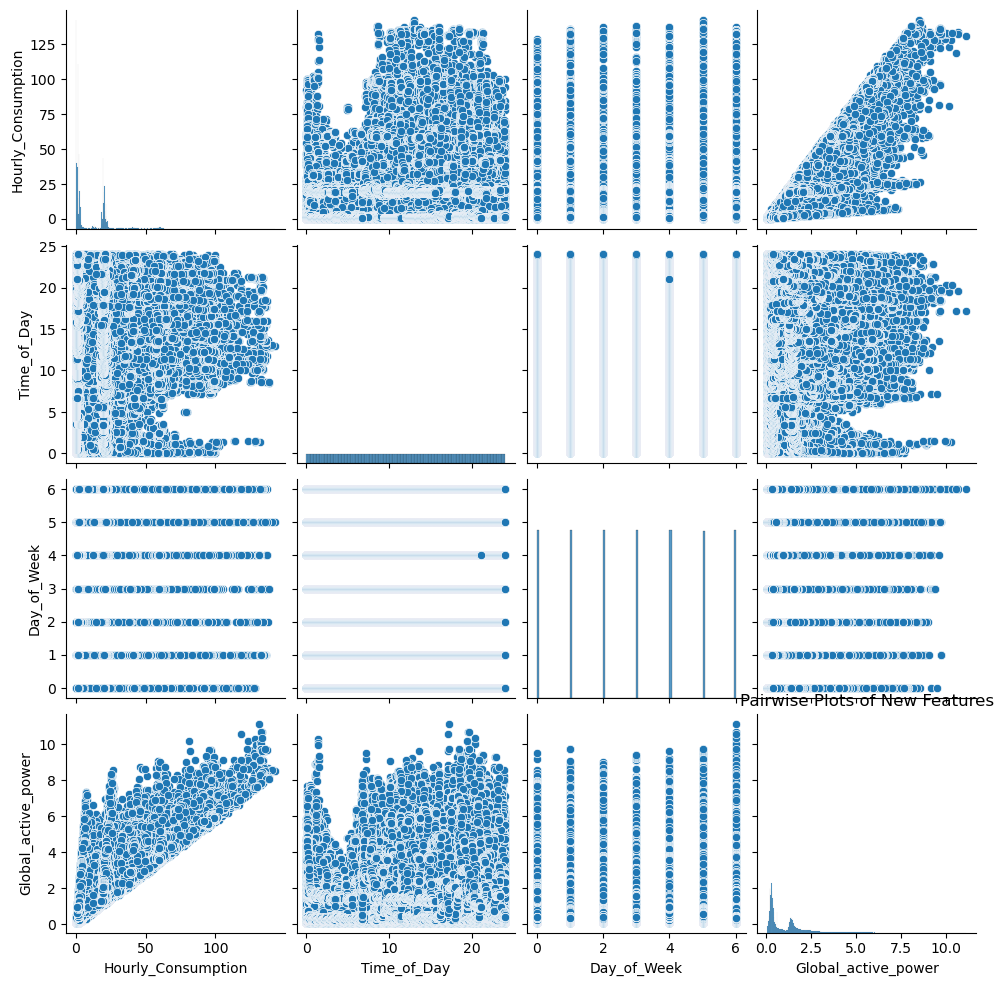

In [24]:
plt.figure(figsize=(10, 8))
sns.pairplot(df[['Hourly_Consumption', 'Time_of_Day', 'Day_of_Week', 'Global_active_power']])
plt.title('Pairwise Plots of New Features')
plt.show()

### 7. Histograms for Multiple Features
- **Purpose**: To compare the distributions of several features at once.

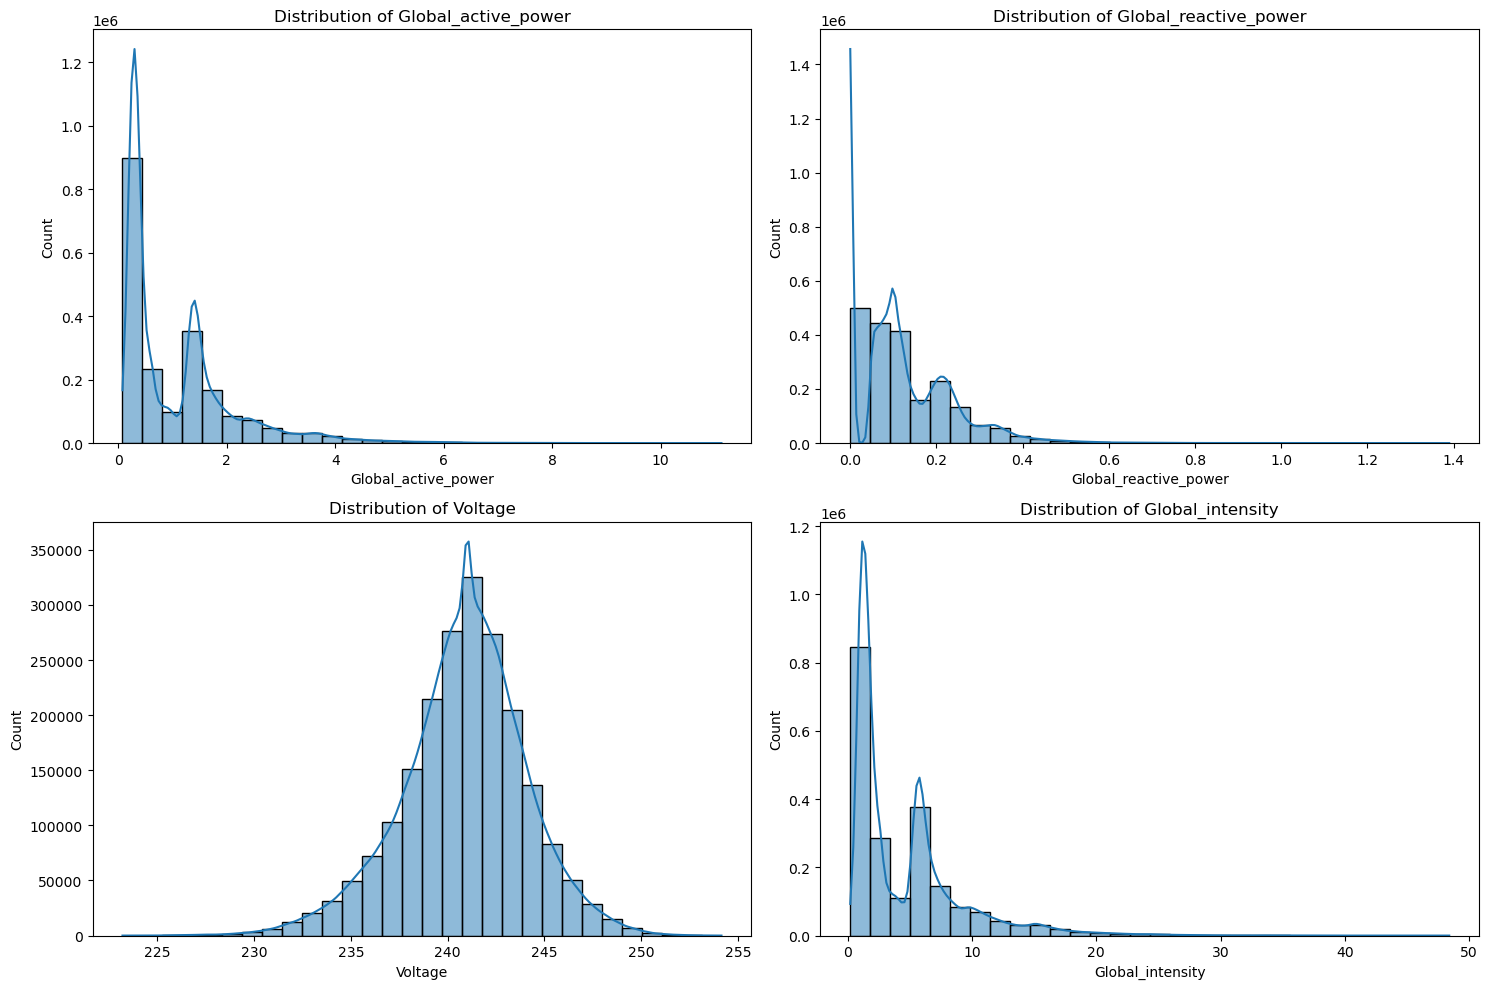

In [25]:
plt.figure(figsize=(15, 10))
features = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Step 5. Regression Modelling

 - **Splitting the Dataset**

In [26]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df[['Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'Hourly_Consumption', 'Time_of_Day', 'Day_of_Week']]
y = df['Global_active_power']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

- **Implementing Regression Models**

### 1. K-Nearest Neighbors Regression (KNN)

In [27]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [28]:
# Initialize the KNN regressor
knn = KNeighborsRegressor()

# Fit the model to the training data
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
# Define the parameter grid
param_grid = {'n_neighbors': list(range(1, 21))}

# Initialize Grid Search
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the Grid Search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_k = grid_search.best_params_['n_neighbors']
print(f"Best number of neighbors: {best_k}")

In [ ]:
# Initialize the KNN regressor with the best k
knn_best = KNeighborsRegressor(n_neighbors=best_k)

# Fit the model to the training data
knn_best.fit(X_train, y_train)

# Make predictions
y_pred = knn_best.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")


In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('KNN Regression: True Values vs Predictions')
plt.show()

### 2. Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Initialize the Linear Regression model
linear_reg = LinearRegression()

# Train the model
linear_reg.fit(X_train, y_train)

In [ ]:
# Make predictions
y_pred = linear_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression - Mean Squared Error: {mse}")
print(f"Linear Regression - Mean Absolute Error: {mae}")
print(f"Linear Regression - R^2 Score: {r2}")


In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Linear Regression: True Values vs Predictions')
plt.show()

### 3. Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
# Initialize the Ridge Regression model
ridge_reg = Ridge()

# Train the model
ridge_reg.fit(X_train, y_train)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}

# Initialize Grid Search
grid_search_ridge = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the Grid Search to the data
grid_search_ridge.fit(X_train, y_train)

# Get the best parameters
best_alpha = grid_search_ridge.best_params_['alpha']
print(f"Best alpha for Ridge Regression: {best_alpha}")


In [ ]:
# Initialize the Ridge Regression model with the best alpha
ridge_reg_best = Ridge(alpha=best_alpha)

# Train the model
ridge_reg_best.fit(X_train, y_train)

# Make predictions
y_pred_ridge = ridge_reg_best.predict(X_test)

# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression - Mean Squared Error: {mse_ridge}")
print(f"Ridge Regression - Mean Absolute Error: {mae_ridge}")
print(f"Ridge Regression - R^2 Score: {r2_ridge}")

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_ridge, alpha=0.6)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Ridge Regression: True Values vs Predictions')
plt.show()

### 4. Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Initialize the Decision Tree Regressor
tree_reg = DecisionTreeRegressor(random_state=42)

# Train the model
tree_reg.fit(X_train, y_train)


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Initialize Grid Search
grid_search_tree = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the Grid Search to the data
grid_search_tree.fit(X_train, y_train)

# Get the best parameters
best_params_tree = grid_search_tree.best_params_
print(f"Best parameters for Decision Tree Regression: {best_params_tree}")


In [ ]:
# Initialize the Decision Tree Regressor with the best parameters
tree_reg_best = DecisionTreeRegressor(**best_params_tree, random_state=42)

# Train the model
tree_reg_best.fit(X_train, y_train)

# Make predictions
y_pred_tree = tree_reg_best.predict(X_test)

# Evaluate the model
mse_tree = mean_squared_error(y_test, y_pred_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f"Decision Tree Regression - Mean Squared Error: {mse_tree}")
print(f"Decision Tree Regression - Mean Absolute Error: {mae_tree}")
print(f"Decision Tree Regression - R^2 Score: {r2_tree}")

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(tree_reg_best, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.title('Decision Tree Visualization')
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_tree, alpha=0.6)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Decision Tree Regression: True Values vs Predictions')
plt.show()

### 5. Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Initialize the Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=42)

# Train the model
rf_reg.fit(X_train, y_train)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Grid Search
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the Grid Search to the data
grid_search_rf.fit(X_train, y_train)

# Get the best parameters
best_params_rf = grid_search_rf.best_params_
print(f"Best parameters for Random Forest Regression: {best_params_rf}")


In [ ]:
# Initialize the Random Forest Regressor with the best parameters
rf_reg_best = RandomForestRegressor(**best_params_rf, random_state=42)

# Train the model
rf_reg_best.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_reg_best.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regression - Mean Squared Error: {mse_rf}")
print(f"Random Forest Regression - Mean Absolute Error: {mae_rf}")
print(f"Random Forest Regression - R^2 Score: {r2_rf}")

In [ ]:
importances = rf_reg_best.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Random Forest Regression: True Values vs Predictions')
plt.show()